In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
import pprint
from cityScraper import transformDataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 5.5)

In [2]:
#read and transform dataset
df = pd.read_csv('data/SF_data_private_3.csv',delimiter=',',index_col=0);
df = transformDataFrame(df)

In [3]:
#Number of training samples
M_train = int(len(df.index)*0.75)

#Randomly sample training set.
train_rows = np.random.choice(df.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)

print('M_train = %i, M_test = %i' % (M_train,len(df.index)-M_train))

M_train = 3265, M_test = 1089


In [4]:
featureList = sorted(list(df.drop(['price'],1)))

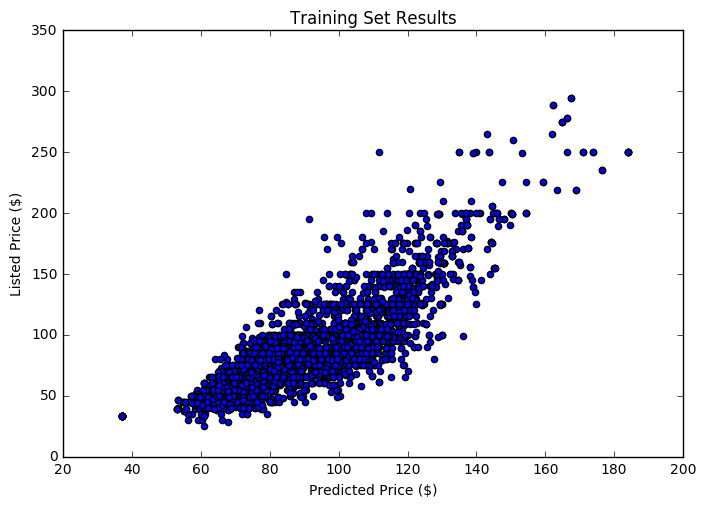

In [5]:
X = np.array(df_train[featureList])
Y = np.array(df_train['price'].astype('float'))
forest=RandomForestRegressor(n_estimators=2000,max_features=10,n_jobs=20,max_depth=10,min_samples_leaf=5)
forest.fit(df_train[featureList],df_train['price'])
df['pred_price']=forest.predict(df[featureList])
plt.scatter(df.ix[train_rows]['pred_price'],df.ix[train_rows]['price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

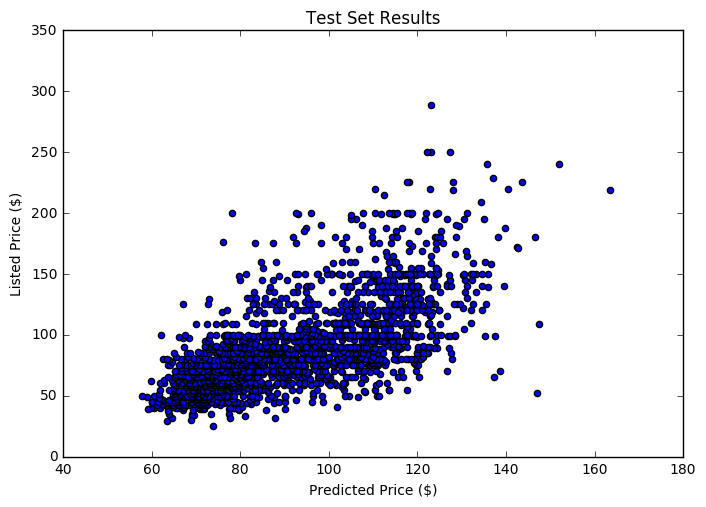

In [6]:
pred = forest.predict(df.drop(train_rows)[featureList])
plt.scatter(pred,df_test['price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

Feature ranking:
1. feature 60 (0.183145)
2. feature 91 (0.144558)
3. feature 89 (0.083998)
4. feature 100 (0.046197)
5. feature 64 (0.045797)
6. feature 95 (0.039409)
7. feature 62 (0.029932)
8. feature 99 (0.029022)
9. feature 96 (0.028010)
10. feature 63 (0.026723)
11. feature 90 (0.024471)
12. feature 98 (0.023211)
13. feature 50 (0.016351)
14. feature 79 (0.016103)
15. feature 14 (0.015201)
16. feature 58 (0.014626)
17. feature 94 (0.012225)
18. feature 12 (0.012135)
19. feature 1 (0.012028)
20. feature 7 (0.008113)
21. feature 56 (0.006973)
22. feature 66 (0.006449)
23. feature 102 (0.006098)
24. feature 30 (0.005992)
25. feature 21 (0.005795)
26. feature 49 (0.005683)
27. feature 6 (0.005641)
28. feature 0 (0.005353)
29. feature 27 (0.005247)
30. feature 75 (0.005205)
31. feature 24 (0.005114)
32. feature 59 (0.005075)
33. feature 23 (0.005007)
34. feature 28 (0.005005)
35. feature 36 (0.004980)
36. feature 31 (0.004904)
37. feature 92 (0.004832)
38. feature 33 (0.004628)
39. fe

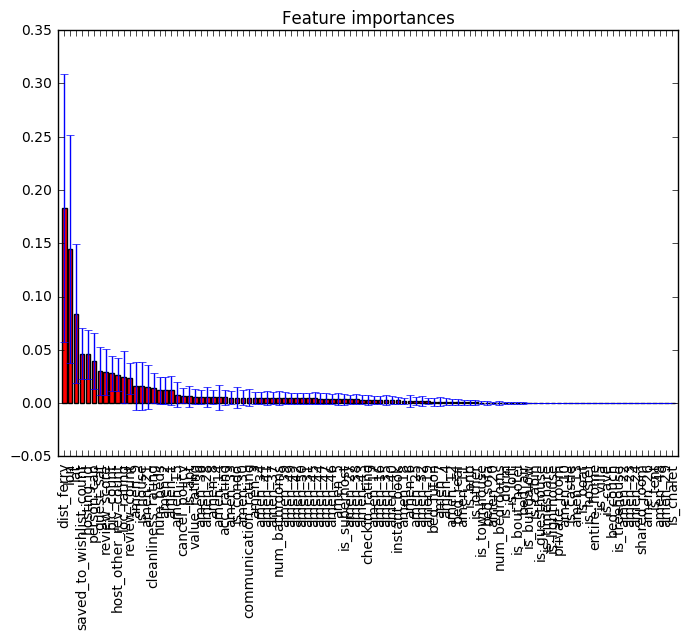

In [7]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [9]:
dbname = 'airbnb_db'
username = 'brian'
pswd = ''
engine = create_engine('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print(engine.url)

postgresql://brian:@localhost/airbnb_db
postgresql://brian:@localhost/airbnb_db


In [10]:
df.to_sql('city_table', engine, if_exists='replace')

In [11]:
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)
# query:
sql_query = 'SELECT * from city_table;'

airbnb_data_from_sql = pd.read_sql_query(sql_query,con)

In [12]:
from sklearn.externals import joblib

In [13]:
joblib.dump(forest,'static/forest_v1.pkl',compress=1)
joblib.dump(featureList,'static/featureList_v1.pkl',compress=1);

In [14]:
forest2 = joblib.load('static/forest_v1.pkl')

In [15]:
forest2.predict(airbnb_data_from_sql[featureList])

array([  37.17487224,   37.17487224,   37.17487224, ...,  139.12319034,
        164.77722508,  117.66390788])

In [18]:
df[['pred_price','price']]

,pred_price,price
5650515,37.174872,33.0
5650515,37.174872,33.0
5650515,37.174872,33.0
16536186,85.701859,38.0
4654218,90.020022,39.0
15026204,87.794080,32.0
11575586,73.866139,40.0
11620,73.372716,35.0
5976428,77.342975,39.0
15097577,68.435509,39.0
